In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mbti_1.csv to mbti_1.csv


In [ ]:
import pandas as pd

df = pd.read_csv("mbti_1.csv")
print(df.head())
print(df.shape)


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
(8675, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Dataset loaded: (8675, 2)
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
Preprocessing...
Preprocessing done.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model trained successfully.
Accuracy: 0.6184438040345821
              precision    recall  f1-score   support

           0       0.63      0.71      0.66       294
           1       0.68      0.46      0.55       137
           2       0.59      0.75      0.66       261
           3       0.60      0.64      0.62       218
           4       0.64      0.20      0.30        46
           5       0.89      0.21      0.34        38
           6       0.59      0.88      0.71       366
           7       0.69      0.53      0.60       135
           8       0.75      0.22      0.34        54
           9       0.82      0.46      0.59        67
          10       0.67      0.24      0.36        33
          11       0.75      0.07      0.13        41
          12       0.50      0.06      0.10        18
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         8
          15       1.00      0.11      0.20         9

    accuracy           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


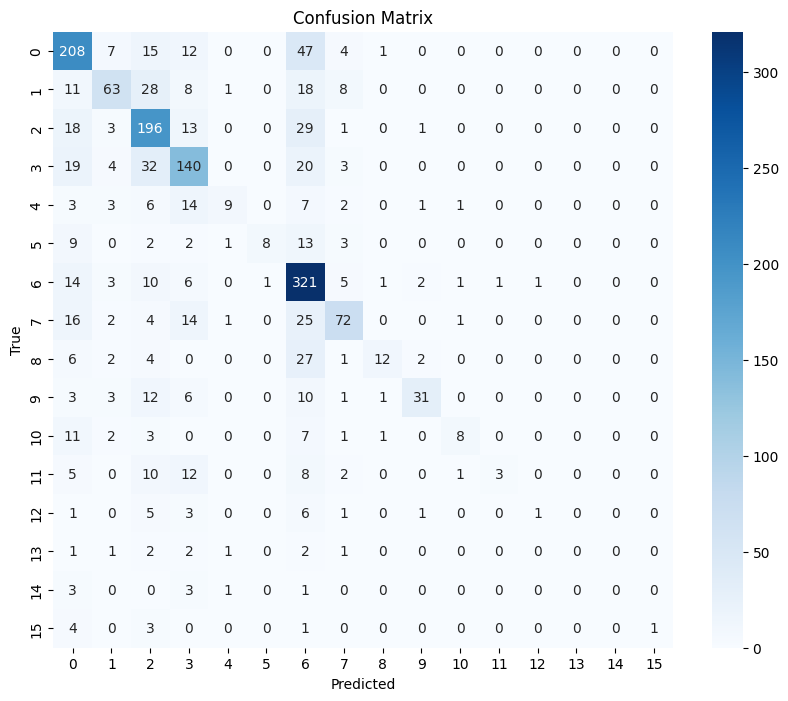

Text: I love spending time alone and reading books.
Predicted MBTI: INFP

Text: I enjoy meeting new people and trying adventurous things!
Predicted MBTI: INTP



In [ ]:
# ✅ Install required libraries
!pip install pandas numpy scikit-learn nltk spacy matplotlib seaborn

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Download NLTK and spaCy models (includes punkt_tab fix)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- this fixes your error
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))

# ✅ Load dataset (make sure you've uploaded mbti_1.csv)
# Use the correct path for the uploaded file
df = pd.read_csv("mbti_1.csv")
print("Dataset loaded:", df.shape)
print(df.head())

# ✅ Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)        # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # remove special chars/numbers
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    doc = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# ✅ Clean text
print("Preprocessing...")
df["cleaned_posts"] = df["posts"].apply(preprocess_text)
print("Preprocessing done.")

# ✅ Encode labels
label_map = {t: i for i, t in enumerate(df["type"].unique())}
df["label_num"] = df["type"].map(label_map)

# ✅ TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df["cleaned_posts"])
y = df["label_num"]

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Train model
model = LogisticRegression(max_iter=300, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
print("Model trained successfully.")

# ✅ Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ Prediction function
reverse_map = {v: k for k, v in label_map.items()}

def predict_mbti(text):
    cleaned = preprocess_text(text)
    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)[0]
    return reverse_map[pred]

# ✅ Test predictions
sample_texts = [
    "I love spending time alone and reading books.",
    "I enjoy meeting new people and trying adventurous things!"
]
for s in sample_texts:
    print(f"Text: {s}\nPredicted MBTI: {predict_mbti(s)}\n")